In [1]:
import pandas as pd
from ml_toolkit.data_handler import DataHandler
from ml_toolkit.model_executor import ModelExecutor
from ml_toolkit.visualizer import Visualizer

2025-06-14 14:25:05.858138: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading raw data from pickle file: '../fin_data/GBP_USD_H4.pkl'...
Filtering data from 2020-01-01 to 2024-07-29.
Data successfully loaded and filtered. Resulting shape: (7130, 6)
Time range in cleaned data: 2020-01-01 22:00:00 to 2024-07-29 21:00:00


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 117ms/step - accuracy: 0.3127 - loss: 1.1126 - val_accuracy: 0.0000e+00 - val_loss: 1.2985
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5575 - loss: 1.0149 - val_accuracy: 0.8593 - val_loss: 0.7288
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6743 - loss: 0.7844 - val_accuracy: 0.7941 - val_loss: 0.7339
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7320 - loss: 0.7120 - val_accuracy: 0.8459 - val_loss: 0.5479
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7440 - loss: 0.6898 - val_accuracy: 0.8519 - val_loss: 0.5604
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7440 - loss: 0.6956 - val_accuracy: 0.9452 - val_loss: 0.3531
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7712 - loss: 0.6567 - val_accuracy: 0.8859 - val_loss: 0.4682
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7571 - loss: 0.6478 - val_accuracy: 0.75

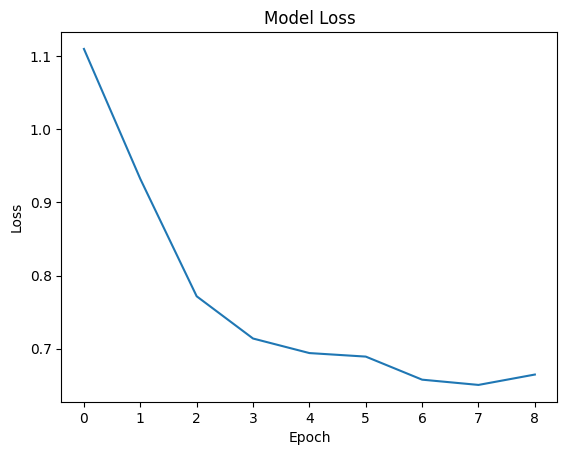

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


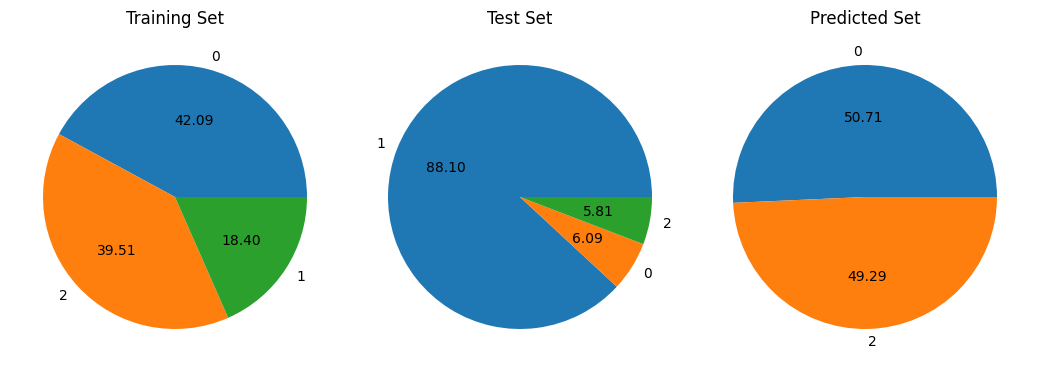

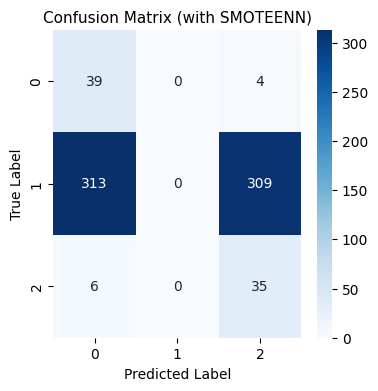

              precision    recall  f1-score   support

        Sell       0.11      0.91      0.19        43
     Neutral       0.00      0.00      0.00       622
         Buy       0.10      0.85      0.18        41

    accuracy                           0.10       706
   macro avg       0.07      0.59      0.12       706
weighted avg       0.01      0.10      0.02       706



Balanced training label distribution: Counter({0: 2839, 2: 2665, 1: 1241})
Minimum label in y_train: 0
Unique classes in y_train: [0 1 2]


Minimum label in y_test: 0
Test label distribution: Counter({1: 622, 0: 43, 2: 41})
Unique classes in y_test: [0 1 2]
Unique classes in y_pred_classes: [0 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.6976524  0.29282612 0.00952148]
 [0.7552307  0.2392765  0.00549276]
 [0.76796055 0.22729611 0.0047434 ]
 [0.7783968  0.21742286 0.00418041]
 [0.79363984 0.20292372 0.00343637]]
Sample y_pred_classes: [0 0 0 0 0]


Initial class weights: {0: 1.0, 1: 0.06252391378861355, 2: 0.9788327420440925}
Optimized Weights: {0: 1.0, 1: 0.100000001, 2: 0.9788327420440925}
Best accuracy score: 0.1048158640226629


In [2]:
model, mse, df, y_test_imputed, y_pred_imputed, test_indices, label_encoder, optimized_class_weights, scaler_X  = ModelExecutor.execute_model(
                  file_path='../fin_data/GBP_USD_H4.pkl', 
                  start_date="2020-1-1", end_date="2024-07-29 21:00", test_size=0.1,
                  features = ['RSI', 'MACD', 'Volume'],
                  imbalance = True, imb_type = 'smote_enn',
                  model_type='Conv1D+GRU', model_style='Functional',
                  model_layers=5, units=64, dropout_rate=0.2,
                  learning_rate = 0.001, epochs=10, batch_size=32*10,
                  plot_type='test',forecast_period_min=60)

# AVAILABLE OPTIONS ------------------------------------------------------------------------------------------------
# features: ['Close', 'Volume', 'RSI', 'MACD']
# imb_type: 'smote', 'adasyn', 'random_oversampler', 'random_undersampler', 'tomek_links', 'nearmiss', 'smote_tomek', 'smote_enn'
# Model style: 'Sequential', 'Functional'
# Model type: 'LSTM', 'GRU', 'Conv1D', 'Transformer', 'Attention', or combinations like 'LSTM+Conv1D+Attention'. 'LSTM+GRU'
# Plot type: 'test', 'train', 'test+train', 'forecast'
# DEAFULTS: model_layers=3, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=10, batch_size=32*1
# You may want to under-train the model, e.g. epochs=3, batch_size=32 ------------------------------------------------

In [3]:
# Plot the data: , y_test_scaled, y_train_scaled 
#plot_predictions(y_test_scaled, y_test_scaled)
n1 = 0
n2 = 200
Visualizer.plot_actual_vs_predicted_lines(y_test_imputed[n1:n2], y_pred_imputed[n1:n2])

In [4]:
# Convert to Series for scaling 
actual_signal_series = pd.Series(y_test_imputed, name='ActualSignal')
predicted_signal_series = pd.Series(y_pred_imputed, name='PredictedSignal')

scaled_actual_signal = DataHandler.scale_to_0_1_range(actual_signal_series).to_numpy()
scaled_predicted_signal = DataHandler.scale_to_0_1_range(predicted_signal_series).to_numpy()


# --- Plot Signals with Candlesticks, Peaks, and Valleys ---
Visualizer.plot_signals_with_candlesticks(
    df=df,
    test_indices=test_indices,
    actual_signal=scaled_actual_signal,
    predicted_signal=scaled_predicted_signal,
    
    # Define thresholds for the 0-1 scaled signals
    actual_peak_threshold=0.9,   
    actual_valley_threshold=0.1,  
    predicted_peak_threshold=0.9, 
    predicted_valley_threshold=0.1,
    
    min_marker_size=2, 
    max_marker_size=15, 
    
    title="Financial Signals: Actual vs. Predicted Peaks and Valleys",
    show_candlesticks=True,
    show_price_line=True
)